In [1]:
import pandas as pd
import numpy.matlib as np
import os

In [7]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Combine All Amazon Reviews into One Dataframe

In [3]:
rootdir = 'Amazon_Reviews'
all_reviews = []

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        df = pd.read_csv(os.path.join(subdir,file))
        df["Product"] = np.repmat(file,df.shape[0],1)
        all_reviews.append(df)
#         print(df.head())

all_reviews_df = pd.concat(all_reviews)

In [4]:
all_reviews_df

title  \
0     Not style pictured, handles made for baby hands.   
1                                  Not made for adults   
2           Hot Liquids Take on a Strong Plastic Taste   
3                                       WASTE OF MONEY   
4                                              Useless   
..                                                 ...   
136                                   Highly recommend   
137                                          great cup   
138                                          Safe Cups   
139                           A great adult sippy cup.   
140  The ease of using these cups with Alzheimers/D...   

                                                review                star  \
0    I also received the cup with the tiny handles ...  1.0 out of 5 stars   
1    This cup is being sold as an Adult cup, it is ...  1.0 out of 5 stars   
2    This cup is fine for cold liquids, but if you ...  2.0 out of 5 stars   
3    After reading the reviews, only a handful rece...  1.0 out of 5 stars   
4    This was definitely designed as a kids sippy c...  1.0 out of 5 stars   
..                                                 ...                 ...   
136  Great products for the elderly.  Especially on...  5.0 out of 5 stars   
137  excellent design.  well constructed.  very hel...  5.0 out of 5 stars   
138  My husband feels more confident with his tea a...  5.0 out of 5 stars   
139                           A great adult sippy cup.  5.0 out of 5 stars   
140       Alzheimer/Dementia patients that I care for.  5.0 out of 5 stars   

                         Product  
0                soupsammons.csv  
1                soupsammons.csv  
2                soupsammons.csv  
3                soupsammons.csv  
4                soupsammons.csv  
..                           ...  
136  soupindependenceplastic.csv  
137  soupindependenceplastic.csv  
138  soupindependenceplastic.csv  
139  soupindependenceplastic.csv  
140  soupindependenceplastic.csv  

[718 rows x 4 columns]

In [5]:
list_of_products = all_reviews_df.Product.unique()

In [6]:
list_of_products

array(['soupsammons.csv', 'soupsafestrawthick.csv',
       'soupsafestrawthin.csv', 'soupkirimon.csv', 'soupprovale.csv',
       'soupbionixthick.csv', 'soupbionixthin.csv', 'soupirije.csv',
       'soupsp.csv', 'soupikinsman.csv', 'soupiweightedbase.csv',
       'soupindependenceplastic.csv'], dtype=object)

# Compute and Plot Polarity Score for Individual Products

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


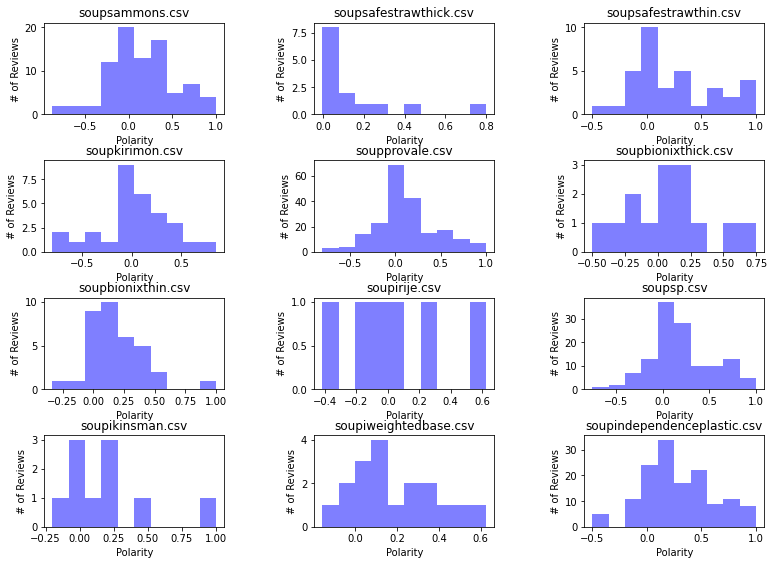

In [27]:
fig = plt.figure(figsize = (10,7), facecolor = None)
c = 1
for product in list_of_products:
    sub_data_frame = all_reviews_df.loc[all_reviews_df["Product"] == product,:]
    pol = lambda x: TextBlob(x).sentiment.polarity
    sub_data_frame['polarity'] = sub_data_frame['review'].apply(pol)
    num_bins = 10
    fig.add_subplot(4, 3, c)
    c = c + 1
    n, bins, patches = plt.hist(sub_data_frame["polarity"], num_bins, facecolor='blue', alpha=0.5)
    plt.title(product)
    plt.xlabel('Polarity')
    plt.ylabel('# of Reviews')
    plt.subplots_adjust(left = 0., bottom = 0, right = 1, top = 1, wspace = 0.5, hspace = 0.5)

# Plot Individual Subjectivity Scores of Each Product

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


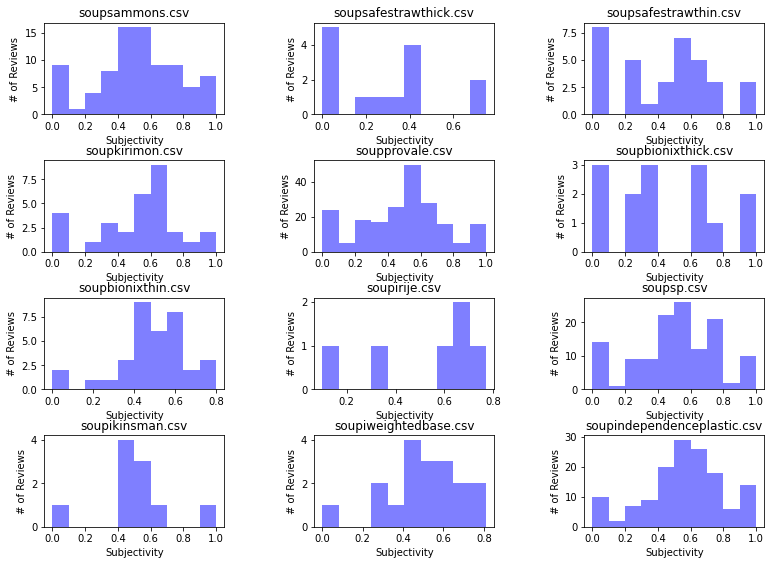

In [25]:
fig = plt.figure(figsize = (10,7), facecolor = None)
c = 1
for product in list_of_products:
    sub_data_frame = all_reviews_df[all_reviews_df["Product"] == product]
#     print(sub_data_frame)
    
    sub = lambda x: TextBlob(x).sentiment.subjectivity
    sub_data_frame['subjectivity'] = sub_data_frame['review'].apply(sub)
    
    num_bins = 10
    fig.add_subplot(4, 3, c)
    c = c + 1
    n, bins, patches = plt.hist(sub_data_frame.subjectivity, num_bins, facecolor='blue', alpha=0.5)
    plt.title(product)
    plt.xlabel('Subjectivity')
    plt.ylabel('# of Reviews')
    plt.subplots_adjust(left = 0., bottom = 0, right = 1, top = 1, wspace = 0.5, hspace = 0.5)

# Polarity/Subjectivity for All Products

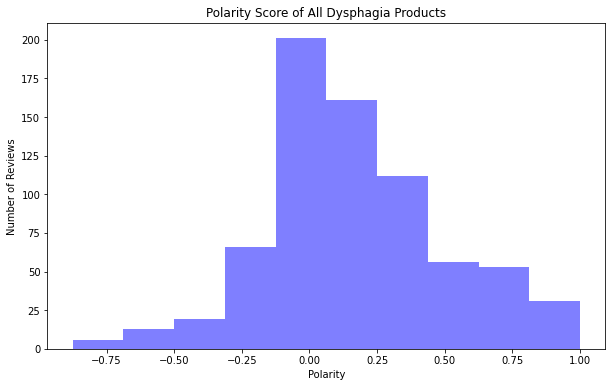

In [21]:
#Creates Polarity Instagram 

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


all_reviews_df['polarity'] = all_reviews_df['review'].apply(pol)
all_reviews_df['subjectivity'] = all_reviews_df['review'].apply(sub)

# HOW TO FILTER
# all_reviews_df[all_reviews_df['polarity'] > 0.5]


num_bins = 10
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(all_reviews_df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Polarity Score of All Dysphagia Products')
plt.show();


/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Subjectivity Score of All Dysphagia Products')

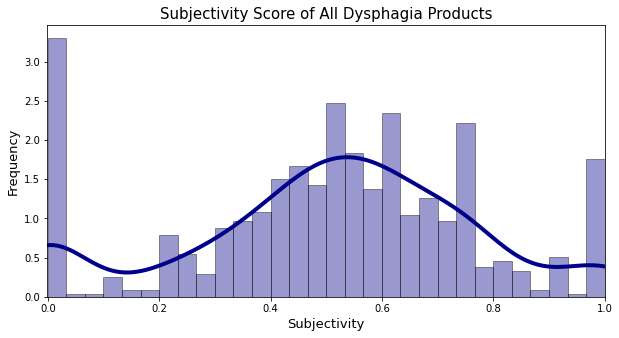

In [22]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.distplot(all_reviews_df['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Subjectivity Score of All Dysphagia Products', fontsize=15)

# WordCloud Analysis

In [20]:
from wordcloud import WordCloud, STOPWORDS

ModuleNotFoundError: No module named 'wordcloud'

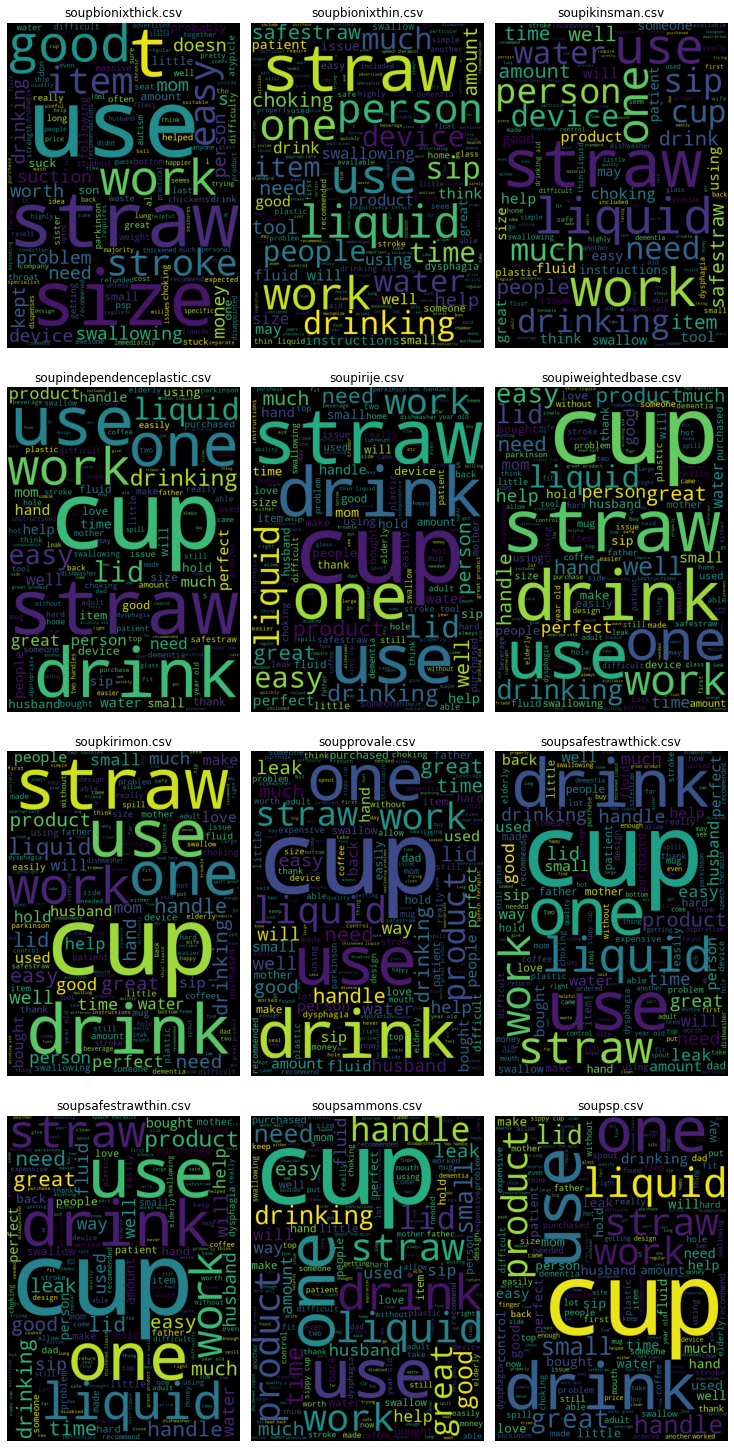

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10), facecolor = None)
c = 1
stop_words = set(STOPWORDS)
comment_words = ""
for product in list_of_products:
    sub_data_frame = all_reviews_df[all_reviews_df["Product"] == product]
    
    for i in sub_data_frame.review: 
        i = str(i) 
        separate = i.split() 
        for j in range(len(separate)): 
            separate[j] = separate[j].lower() 
      
        comment_words += " ".join(separate)+" "
    final_wordcloud = WordCloud(width = 500, height = 700, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 8).generate(comment_words)

    fig.add_subplot(4, 3, c)
    c = c + 1
    plt.imshow(final_wordcloud) 
    plt.axis("off") 
    plt.title(product)
    plt.subplots_adjust(left = 0., bottom = 0, right = 0.5, top = 1, wspace = 0.05, hspace = 0.05)
    plt.show

Word Cloud for All Dysphagia Products


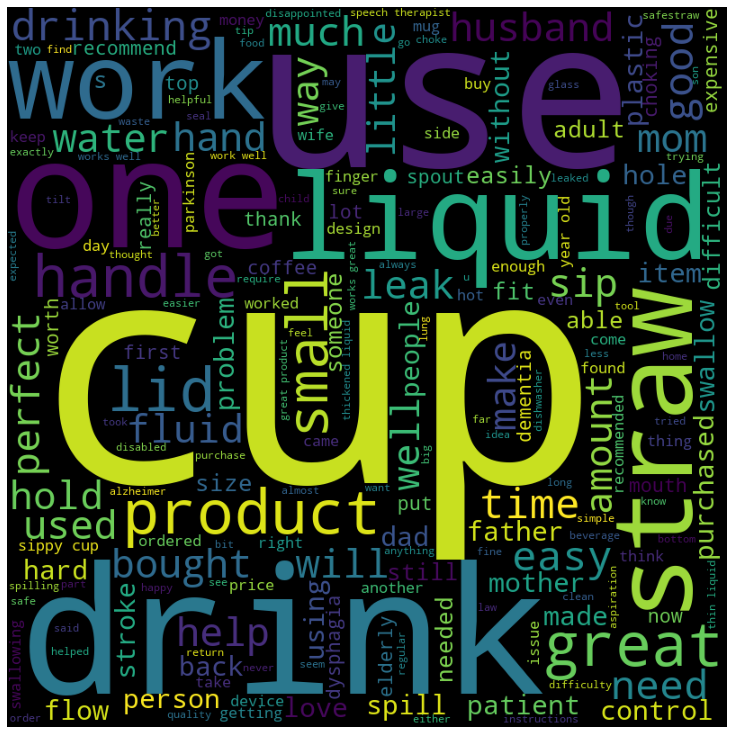

In [13]:
#Creates a WordCloud out of all the reviews 

stop_words = set(STOPWORDS)
comment_words = ""
for i in all_reviews_df.review: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+" "
final_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
print("Word Cloud for All Dysphagia Products")
  
plt.show()

# Unsupervised Clustering

In [14]:
df1 = all_reviews_df[["Product", "review"]]
df1

Product                                             review
0    soupbionixthick.csv  Really good for me, with difficulty swallowing...
1    soupbionixthick.csv  It doesn’t work for me I have no suction my th...
2    soupbionixthick.csv                           They don’t last too long
3    soupbionixthick.csv  It helped my sister drink water again after ha...
4    soupbionixthick.csv                                  Difficult to use.
..                   ...                                                ...
121           soupsp.csv  My dad used these cups when he was in an ortho...
122           soupsp.csv                            Very helpful for my Mom
123           soupsp.csv  I bought this cup for my father who is bedridd...
124           soupsp.csv  Works as advertised.  Very helpful following m...
125           soupsp.csv                    Great product and a great price

[718 rows x 2 columns]

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [17]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df["review"])

In [18]:
X

<126x793 sparse matrix of type '<class 'numpy.float64'>'
	with 1685 stored elements in Compressed Sparse Row format>

In [20]:
inertia=[]
for k in range(2,126):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=25).fit(X)
    inertia.append(kmeans.inertia_)

c:\users\jaeme\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (122) found smaller than n_clusters (123). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\jaeme\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (122) found smaller than n_clusters (124). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\jaeme\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (122) found smaller than n_clusters (125). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until


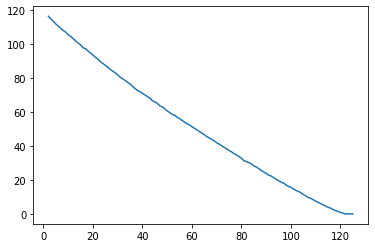

In [21]:
plt.plot(range (2,126),inertia)

In [22]:
test_k = 5
kmeans = KMeans(n_clusters=test_k, random_state=0,n_init=25).fit(X)
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(test_k):
    print("Cluster")
    print(i)
    for ind in order_centroids[i, :10]:
        print(terms[ind])

Cluster
0
perfect
works
daughter
used
tried
product
loves
happy
ok
cheap
Cluster
1
great
works
cup
dementia
worked
price
granddaughter
spill
loved
disables
Cluster
2
good
elderly
mother
plastic
didn
law
handy
rest
thing
bed
Cluster
3
cup
small
mom
lid
adult
doesn
liquids
dad
use
needed
Cluster
4
flow
hole
finger
control
drink
liquid
does
spilling
cup
able


In [23]:
for i in X:
    print(vectorizer.inverse_transform(i))
    print(kmeans.predict(i))

[array(['marked', 'noticed', 'discolored', 'just', 'taste', 'smell',
       'residual', 'product', 'true', 'inside', 'stain', 'slightly',
       'does', 'tomato', 'negative', 'time', 'recovery', 'impressed',
       'told', 'eating', 'asked', 'surgeon', 'plastic', 'pour', 'cup',
       'measuring', 'glass', 'soup', 'heat', 'microwave', 'don', 'shelf',
       'dw', 'hand', 'wash', 'easy', 'sitting', 'use', 'laying', 'used',
       'says', 'description', 'finding', 'eat', 'able', 'weight',
       'losing', 'rapidly', 'solution', 'perfect', 'surgery',
       'reconstruction', 'facial', 'waiting', 'chew', 'unable', 'foods',
       'similar', 'soups', 'creamed', 'smoothies', 'drinking', 'great',
       'work', 'cups', 'total', 'ordered', 've'], dtype='<U14')]
[0]
[array(['drink', 'reclined', 'flexy', 'straw', 'flexible', 'uses', 'grip',
       'good', 'worked', 'size', 'tiny', 'small', 'hands', 'doesn',
       'parkinson', 'like', 'stiffness', 'control', 'motor', 'includes',
       'alzheime

      dtype='<U14')]
[4]
[array(['pop', 'lightweight', 'sturdy', 'lids', 'tight', 'fit',
       'dishwasher', 'love', 'drink', 'straw', 'easy', 'cups'],
      dtype='<U14')]
[3]
[array(['provide', 'enabled', 'item', 'ridden', 'safely', 'purchased',
       'liquids', 'bed', 'make', 'mother', 'easier', 'drink', 'straw',
       'cup', 'used'], dtype='<U14')]
[3]
[array(['difficulty', 'daily', 'bought', 'mother', 'used'], dtype='<U14')]
[0]
[array(['residents', 'home', 'nursing', 'works'], dtype='<U14')]
[0]
[array(['works', 'great'], dtype='<U14')]
[1]
[array(['disappointing', 'head', 'lift', 'holding', 'choke', 'finger',
       'makes', 'hole', 'spills', 'easier', 'drink', 'does', 'cup',
       'unable'], dtype='<U14')]
[4]
[array(['daughter', 'perfect'], dtype='<U14')]
[0]
[array(['tree', 'dollar', 'sippee', 'baby', 'aspiration', 'problems',
       'opening', 'big', 'ended', 'bought', 'using', 'mom', 'spout',
       'elderly', 'straw', 'used', 'cups'], dtype='<U14')]
[0]
[array(['didn',